<a href="https://colab.research.google.com/github/FernandoElizarraras7/SIMULACION-I/blob/main/INTEGRACION_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESTIMACION DE UNA INTEGRAL

Estimar la siguinete integral:
$$\int_0^1{\sqrt{arctan(x)}}dx$$
por el método de la media muestral y el método de acierto y error.
## Método de la Media Muestral
El método de la media muestral es una técnica de simulación utilizada para estimar el valor de una integral definida, especialmente cuando la función a integrar es compleja o no tiene una antiderivada simple. El método se basa en la idea de utilizar la media aritmética de los valores de la función en puntos aleatorios dentro del intervalo de integración.
### Procedimiento
1.   **Generación de Muestras Aleatorias:** Se generan $n$ muestras aleatorias $x_1, x_2, …, x_n$uniformemente distribuidas en el intervalo $[a,b]$ donde se desea estimar la integral.
2.   **Evaluación de la Función:** Se evalúa la función $f(x)$ en cada una de estas muestras, obteniendo los valores $f(x_1), f(x_2), …, f(x_n)$.
3. **Cálculo de la Media:** Se calcula la media aritmética de estos valores:
$$Media=\frac{1}{n}\sum_{i=1}^{n}f(x_i)$$
4. **Estimación de la Integral:** La integral $\int_{a}^{b}f(x)dx$ se estima como el producto de la media obtenida por la longitud del intervalo $(b-a)$:
$$\int_{a}^{b}f(x)dx≈(b-a)×Media$$

### Ventajas
*   **Simplicidad:** Es un método fácil de entender e implementar.
*   **Aplicabilidad:** Puede ser utilizado para una amplia variedad de funciones, incluso cuando no es posible encontrar una antiderivada analítica.

### Desventajas
*   **Precisión:** La precisión de la estimación depende del número de muestras $n$. Más muestras generalmente proporcionan una mejor estimación, pero también aumentan el tiempo de cómputo.
*   **Variabilidad:** Hay variabilidad inherente en la estimación debido al uso de muestras aleatorias, por lo que diferentes ejecuciones pueden dar resultados ligeramente diferentes.

## Simulación de la integral propuesta por el método de la media muestral



MEDIA MUESTRAL: 
Estimación = 0.62977 
Intervalo de Confianza 95% = (0.62935, 0.63019)


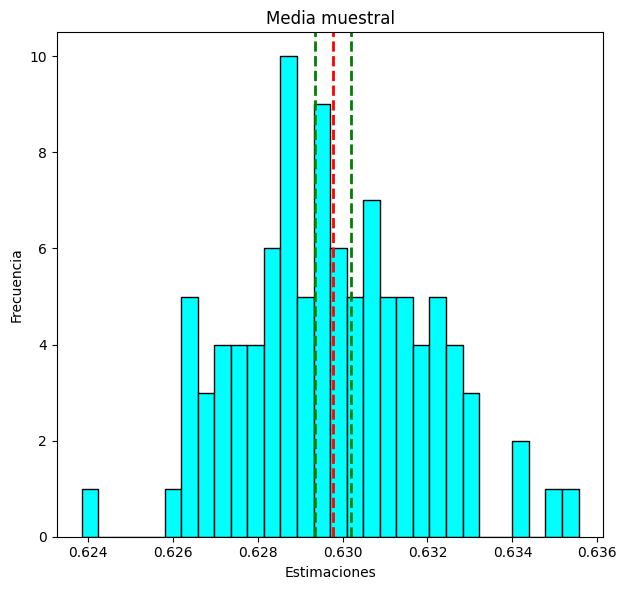

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definir la función a integrar
def integrando(x):
    return np.sqrt(np.arctan(x))

# Método de la media muestral
def monte_carlo_media(n_muestras):
    muestras_x = np.random.uniform(0, 1, n_muestras)  # Generar muestras uniformemente distribuidas en [0, 1]
    evaluaciones = integrando(muestras_x)  # Evaluar la función integrando en las muestras generadas
    estimacion_media = np.mean(evaluaciones)  # Calcular la estimación de la media muestral
    return estimacion_media

# Calcular intervalos de confianza
def intervalo_confianza(data, confianza=0.95):
    media = np.mean(data)  # Calcular la media de los datos
    error_estandar = np.std(data) / np.sqrt(len(data))  # Calcular el error estándar de la media
    margen = error_estandar * norm.ppf((1 + confianza) / 2)  # Calcular el margen de error
    return media, media - margen, media + margen

# Número de muestras para la simulación
n_muestras = 10000
n_simulaciones = 100

# Realizar simulaciones
estimaciones_media = [monte_carlo_media(n_muestras) for _ in range(n_simulaciones)]

# Calcular intervalos de confianza
ci_media = intervalo_confianza(estimaciones_media)

# Imprimir resultados
print(f"MEDIA MUESTRAL: \nEstimación = {ci_media[0]:.5f} \nIntervalo de Confianza 95% = ({ci_media[1]:.5f}, {ci_media[2]:.5f})")

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Histograma de la media muestral
plt.subplot(1, 2, 1)
plt.hist(estimaciones_media, bins=30, color='aqua', edgecolor='black')
plt.axvline(ci_media[0], color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci_media[1], color='green', linestyle='dashed', linewidth=2)
plt.axvline(ci_media[2], color='green', linestyle='dashed', linewidth=2)
plt.title('Media muestral')
plt.xlabel('Estimaciones')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## Método de Acierto y Error (Hit-and-Miss)
El método de acierto y error es otra técnica de simulación utilizada para estimar el valor de una integral definida, especialmente útil cuando la función a integrar es no negativa y está acotada dentro del intervalo de integración.
### Procedimiento
1.   **Generación de Puntos Aleatorios:** Se generan $n$ pares de puntos aleatorios $(x_i, y_i)$ uniformemente distribuidos en el rectángulo definido por el intervalo de integración $[a,b]×[0,M]$, donde $M$ es una cota superior de la función $f(x)$ dentro del intervalo $[a,b]$.
2.   **Conteo de Aciertos:** Para cada par $(x_i, y_i)$, se verifica si $y_i≤f(x_i)$. Y se cuentan cuántos de estos puntos cumplen con esta condición, es decir, cuántos puntos caen debajo de la curva $f(x)$.
3. **Cálculo del Área Aproximada:** El área debajo de la curva $f(x)$ en el intervalo $[a,b]$ se estima como el producto del área del rectángulo de integración por la proporción de puntos que cumplen la condición de estar debajo de la curva:
$$Area\,Estimada=(b-a)$$

### Ventajas
*   **Simplicidad:** Es relativamente simple de implementar.
*   **Eficiencia:** Puede ser eficiente si se elige $M$ de manera adecuada para minimizar el número de puntos necesarios.
*   **Aplicabilidad:** Es efectivo para funciones no negativas y acotadas dentro del intervalo de integración.
### Desventajas
*   **Precisión:** La precisión de la estimación depende de la elección adecuada de $M$ y del número de puntos $n$ generados.
*   **Limitación de Aplicación:** No es aplicable directamente a funciones negativas o funciones que no están acotadas dentro del intervalo de integración.










ACIERTO Y ERROR: 
Estimación = 0.62998 
Intervalo de Confianza 95% = (0.62923, 0.63073)


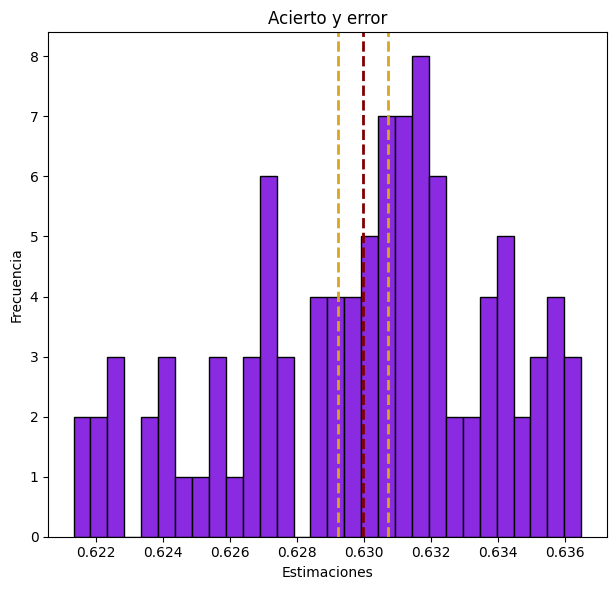

In [26]:
# Método de acierto y error
def monte_carlo_acierto_error(n_muestras):
    muestras_x = np.random.uniform(0, 1, n_muestras)  # Generar muestras uniformemente distribuidas en [0, 1]
    muestras_y = np.random.uniform(0, np.sqrt(np.arctan(1)), n_muestras)  # Generar muestras uniformes en [0, sqrt(arctan(1))]
    aciertos = muestras_y <= integrando(muestras_x)  # Verificar cuántas muestras caen por debajo de la curva de la función integrando
    ratio_aciertos = np.mean(aciertos)  # Calcular la proporción de aciertos
    estimacion_area = ratio_aciertos * np.sqrt(np.arctan(1))  # Estimar el área bajo la curva
    return estimacion_area

# Realizar simulaciones
estimaciones_acierto_error = [monte_carlo_acierto_error(n_muestras) for _ in range(n_simulaciones)]

# Calcular intervalos de confianza
ci_acierto_error = intervalo_confianza(estimaciones_acierto_error)

# Imprimir resultados
print(f"ACIERTO Y ERROR: \nEstimación = {ci_acierto_error[0]:.5f} \nIntervalo de Confianza 95% = ({ci_acierto_error[1]:.5f}, {ci_acierto_error[2]:.5f})")

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Histograma del método de acierto y error
plt.subplot(1, 2, 2)
plt.hist(estimaciones_acierto_error, bins=30, color='blueviolet', edgecolor='black')
plt.axvline(ci_acierto_error[0], color='maroon', linestyle='dashed', linewidth=2)
plt.axvline(ci_acierto_error[1], color='goldenrod', linestyle='dashed', linewidth=2)
plt.axvline(ci_acierto_error[2], color='goldenrod', linestyle='dashed', linewidth=2)
plt.title('Acierto y error')
plt.xlabel('Estimaciones')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## Comentarios Adicionales
*  **Comparación y Conclusión:** Sería útil incluir una sección final en la notebook de Google Colab donde se discuta brevemente la comparación entre los resultados obtenidos por ambos métodos. Por ejemplo, cómo varían las estimaciones y los intervalos de confianza, cuál método parece más preciso en este contexto específico, etc.
*   **Documentación y Comentarios en Código:** Aunque el código actual es claro, agregar comentarios adicionales en partes críticas del código (por ejemplo, dentro de las funciones) podría ayudar a futuros usuarios o a ti mismo a entender rápidamente qué hace cada parte del código.
*   **Optimización y Escalabilidad:** Para estudios futuros, considera la optimización del código, especialmente cuando aumenta el número de simulaciones o el tamaño de las muestras. Esto puede implicar técnicas como el uso de operaciones vectorizadas en lugar de bucles for para mejorar el rendimiento.



